In [0]:
from google.colab import drive
drive.mount('/content/Drive')
!ls

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).
Test  Training	Validation


In [0]:
import os
os.getcwd()

os.chdir('/content/Drive/My Drive/Colab Notebooks/data')

!ls  

Test  Training	Validation


In [0]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

In [0]:
 conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir ='/content/Drive/My Drive/Colab Notebooks/data'
train_dir = os.path.join(base_dir, 'Training')
validation_dir = os.path.join(base_dir, 'Validation')
test_dir = os.path.join(base_dir, 'Test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 10
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
train_features, train_labels = extract_features(train_dir, 50)
validation_features, validation_labels = extract_features(validation_dir,50)
test_features, test_labels = extract_features(test_dir, 16)




Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [0]:
train_features = np.reshape(train_features, (50, 4*4* 512))
validation_features = np.reshape(validation_features, (50, 4*4* 512))
test_features = np.reshape(test_features, (16, 4*4* 512))

In [0]:
from keras import models
from keras import layers
from keras import optimizers
import keras

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4* 4 * 512))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss='binary_crossentropy',
metrics=['acc'])

history = model.fit(train_features, train_labels,
epochs=20,
batch_size=20,
validation_data=(validation_features, validation_labels)
)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50 samples, validate on 50 samples
Epoch 1/20
50/50 [==============================] - 0s 8ms/step - loss: 0.7259 - acc: 0.5200 - val_loss: 0.6881 - val_acc: 0.6800
Epoch 2/20
50/50 [==============================] - 0s 463us/step - loss: 0.7076 - acc: 0.5800 - val_loss: 0.6905 - val_acc: 0.6000
Epoch 3/20
50/50 [==============================] - 0s 419us/step - loss: 0.6795 - acc: 0.6000 - val_loss: 0.6935 - val_acc: 0.6000
Epoch 4/20
50/50 [==============================] - 0s 441us/step - loss: 0.7267 - acc: 0.5400 - val_loss: 0.6967 - val_acc: 0.6000
Epoch 5/20
50/50 [==============================] - 0s 407us/step - loss: 0.6844 - acc: 0.6000 - val_loss: 0.7052 - val_acc: 0.5400
Epoch 6/20
50/50 [==============================] - 0s 443us/step - loss: 0.6832 - a

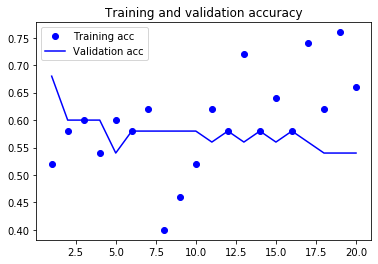

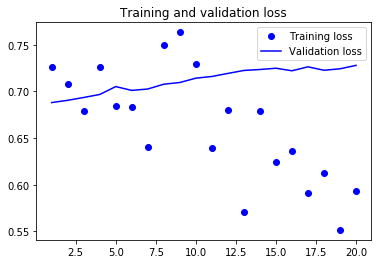

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 31s 311ms/step - loss: 0.6300 - acc: 0.6290 - val_loss: 0.9069 - val_acc: 0.5810
Epoch 2/30
100/100 [==============================] - 25s 249ms/step - loss: 0.4265 - acc: 0.7960 - val_loss: 1.5081 - val_acc: 0.4434
Epoch 3/30
100/100 [==============================] - 25s 247ms/step - loss: 0.2825 - acc: 0.8825 - val_loss: 1.9734 - val_acc: 0.3952
Epoch 4/30
100/100 [==============================] - 25s 249ms/step - loss: 0.1494 - acc: 0.9550 - val_loss: 3.5109 - val_acc: 0.4381
Epoch 5/30
100/100 [==============================] - 25s 247ms/step - loss: 0.1030 - acc: 0.9670 - val_loss: 3.4858 - val_acc: 0.4663
Epoch 6/30
100/100 [==============================] - 25s 249ms/step - loss: 0.0995 - acc: 0.9680 - val_loss: 3.9150 - val_acc: 0.4024
Epoch 7/30
100/100 [==============================] - 25s 248ms/step - loss: 0.0743 - acc: 0.9735 - val_loss: 

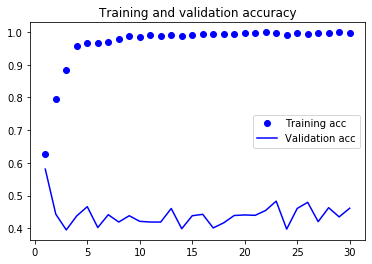

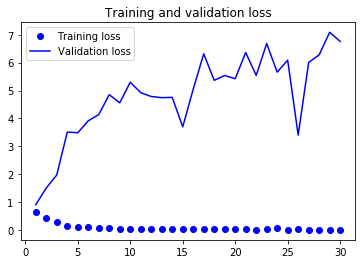

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [0]:
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5),
    metrics=['acc'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=20)

Epoch 1/100
100/100 [==============================] - 20s 196ms/step - loss: 1.7176e-04 - acc: 1.0000 - val_loss: 6.9737 - val_acc: 0.4471
Epoch 2/100
100/100 [==============================] - 19s 185ms/step - loss: 2.3756e-05 - acc: 1.0000 - val_loss: 7.2826 - val_acc: 0.4152
Epoch 3/100
100/100 [==============================] - 19s 187ms/step - loss: 1.3716e-04 - acc: 1.0000 - val_loss: 7.1080 - val_acc: 0.4424
Epoch 4/100
100/100 [==============================] - 18s 185ms/step - loss: 1.0806e-05 - acc: 1.0000 - val_loss: 7.4109 - val_acc: 0.4647
Epoch 5/100
100/100 [==============================] - 19s 187ms/step - loss: 2.5872e-07 - acc: 1.0000 - val_loss: 7.5920 - val_acc: 0.4242
Epoch 6/100
100/100 [==============================] - 19s 186ms/step - loss: 6.2581e-04 - acc: 0.9995 - val_loss: 6.9356 - val_acc: 0.4485
Epoch 7/100
100/100 [==============================] - 18s 185ms/step - loss: 1.6239e-06 - acc: 1.0000 - val_loss: 7.1239 - val_acc: 0.4206
Epoch 8/100
100/100 

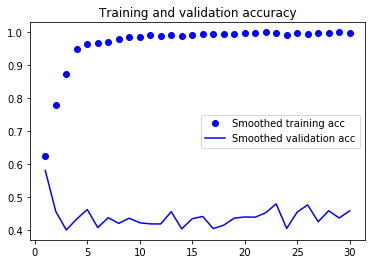

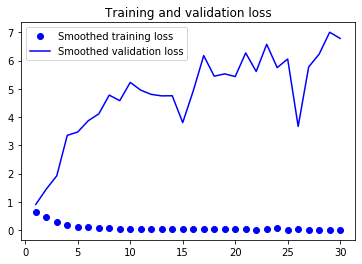

In [0]:
def smooth_curve(points, factor=0.1):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
        smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
  smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
  smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
  smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
  smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=1,
    class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

Found 16 images belonging to 2 classes.
test acc: 0.6
